# EDA on FIFA World Cup Matches

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-world-cup/WorldCupPlayers.csv
/kaggle/input/fifa-world-cup/WorldCupMatches.csv
/kaggle/input/fifa-world-cup/WorldCups.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import plotly as py
import cufflinks as cf

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from plotly.offline import iplot

In [9]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
world_cups = pd.read_csv('../input/fifa-world-cup/WorldCups.csv')
players = pd.read_csv('../input/fifa-world-cup/WorldCupPlayers.csv')
matches = pd.read_csv('../input/fifa-world-cup/WorldCupMatches.csv')

In [12]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [13]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [14]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [15]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 

In [16]:
matches.dropna(subset=['Year'], inplace=True)

In [17]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [18]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
Wales                          1
rn">Serbia and Montenegro      1
Jamaica                        1
rn">Trinidad and Tobago        1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 78, dtype: int64

In [19]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
rn">Serbia and Montenegro     1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [20]:
names.index

Index(['rn">Republic of Ireland', 'rn">Bosnia and Herzegovina',
       'rn">United Arab Emirates', 'rn">Serbia and Montenegro',
       'rn">Trinidad and Tobago'],
      dtype='object')

In [21]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Bosnia and Herzegovina',
 'rn">United Arab Emirates',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago']

In [22]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Bosnia and Herzegovina',
 'United Arab Emirates',
 'Serbia and Montenegro',
 'Trinidad and Tobago']

In [23]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [24]:
wrong = wrong + old
correct = correct + new

In [25]:
wrong, correct

(['rn">Republic of Ireland',
  'rn">Bosnia and Herzegovina',
  'rn">United Arab Emirates',
  'rn">Serbia and Montenegro',
  'rn">Trinidad and Tobago',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Bosnia and Herzegovina',
  'United Arab Emirates',
  'Serbia and Montenegro',
  'Trinidad and Tobago',
  'Germany',
  'Maracanã Stadium',
  'Maracanã Stadium'])

In [26]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [27]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

#  Most Number of World Cup Winning Title

In [28]:
winner = world_cups['Winner'].value_counts()
winner

Brazil       5
Germany      4
Italy        4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [29]:
runnerup = world_cups['Runners-Up'].value_counts()
runnerup

Germany           4
Netherlands       3
Argentina         3
Italy             2
Hungary           2
Brazil            2
Czechoslovakia    2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

In [30]:
third = world_cups['Third'].value_counts()
third

Germany        4
France         2
Brazil         2
Poland         2
Sweden         2
Austria        1
USA            1
Netherlands    1
Portugal       1
Turkey         1
Croatia        1
Chile          1
Italy          1
Name: Third, dtype: int64

In [32]:
teams = pd.concat([winner, runnerup, third], axis = 1)
teams.fillna(0, inplace = True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


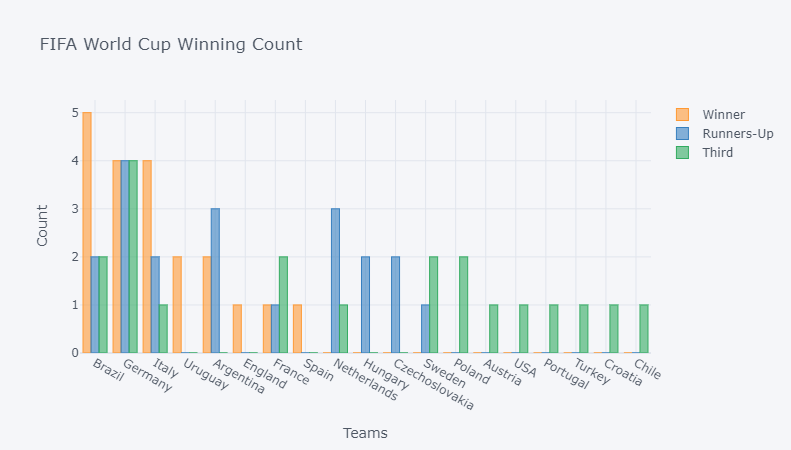

In [33]:
teams.iplot(kind = 'bar', xTitle = 'Teams', yTitle = 'Count', title = 'FIFA World Cup Winning Count')

# Number of Goal Per Country 

In [34]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [35]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [36]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [37]:
goals = home.append(away, ignore_index=True)

In [38]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [39]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


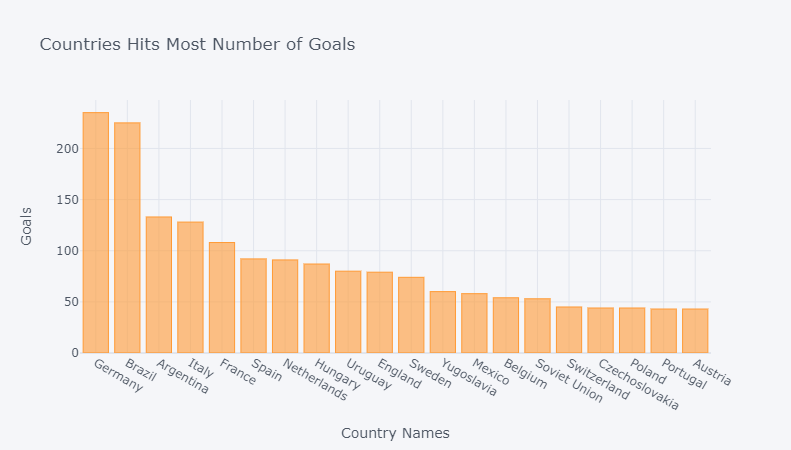

In [40]:
goals[:20].iplot(kind = 'bar', xTitle = 'Country Names', yTitle = 'Goals', title = 'Countries Hits Most Number of Goals')

# Attendance, Number of Teams, Goals, and Matches per Cup

In [47]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace(".", "")

In [48]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


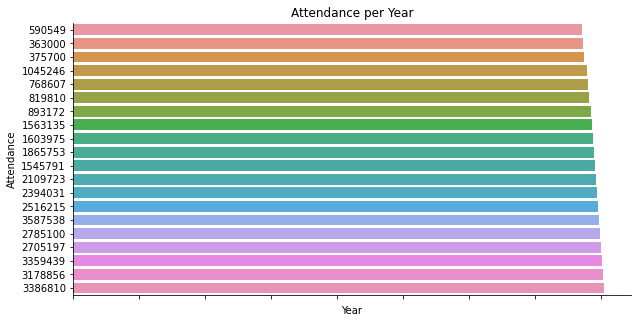

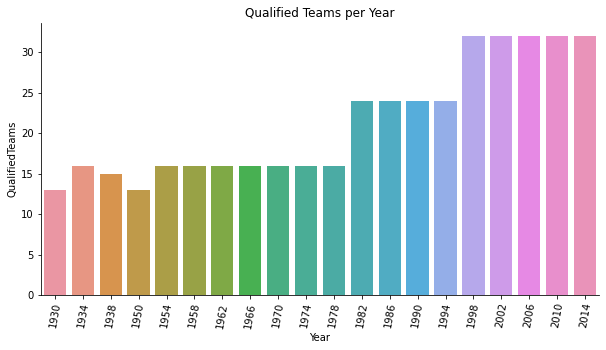

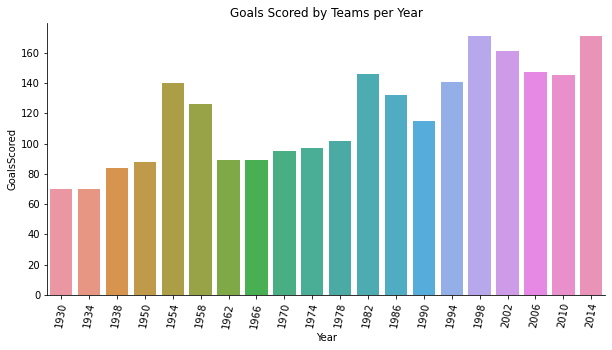

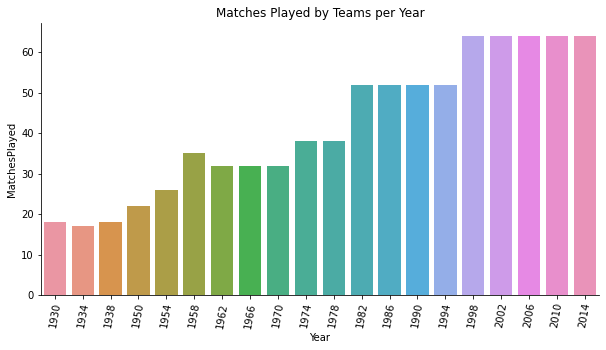

In [49]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams per Year')

#======================
fig, ax = plt.subplots(figsize = (10, 5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played by Teams per Year')



plt.show()

# Goals Per Team Per Word Cup 


In [50]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [51]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [52]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [53]:
goals = pd.concat([home, away], axis = 1)
goals.fillna(0, inplace = True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                     
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [54]:
goals = goals.reset_index()

In [55]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending=[True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [56]:
top5 = goals.groupby('Year').head(5)
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [57]:
import plotly.graph_objects as go

In [59]:
x, y = goals['Year'].values, goals['Goals'].values

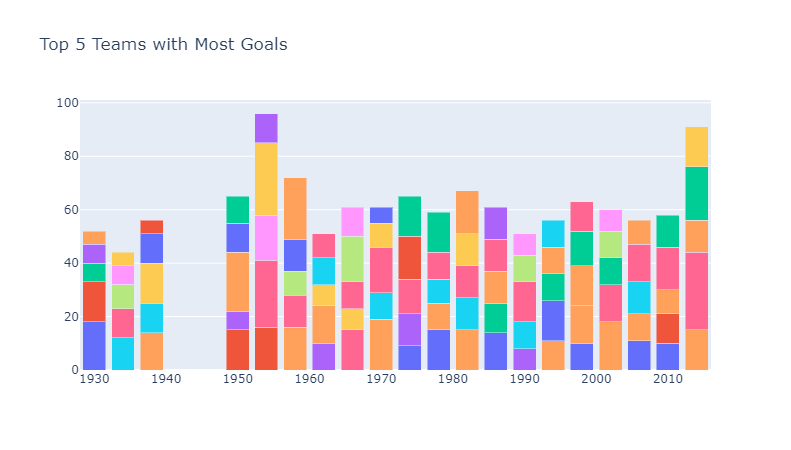

In [60]:
data = []

for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
    
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with Most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

# Matches with Highest Number of Attendance

In [61]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [62]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [63]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))

In [64]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


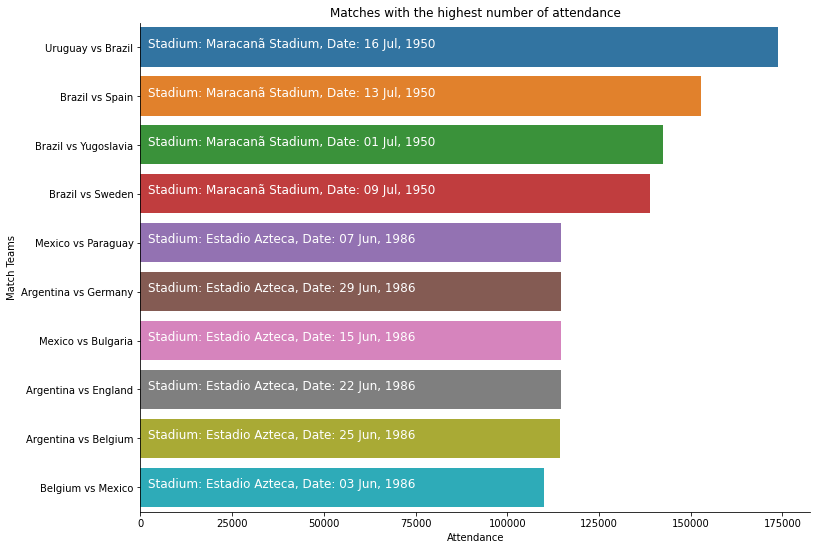

In [65]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12, 9))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of attendance')

for i, s in enumerate("Stadium: " + top10['Stadium'] + ", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()

# Stadiums with Highest Average Attendance

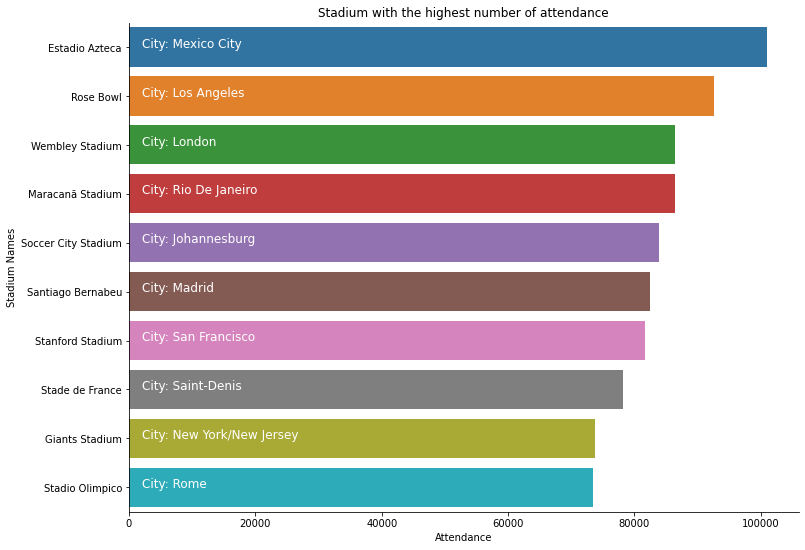

In [66]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending = False)

top10 = std[:10]


plt.figure(figsize= (12, 9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the highest number of attendance')

for i, s in enumerate("City: " + top10['City']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')

plt.show()

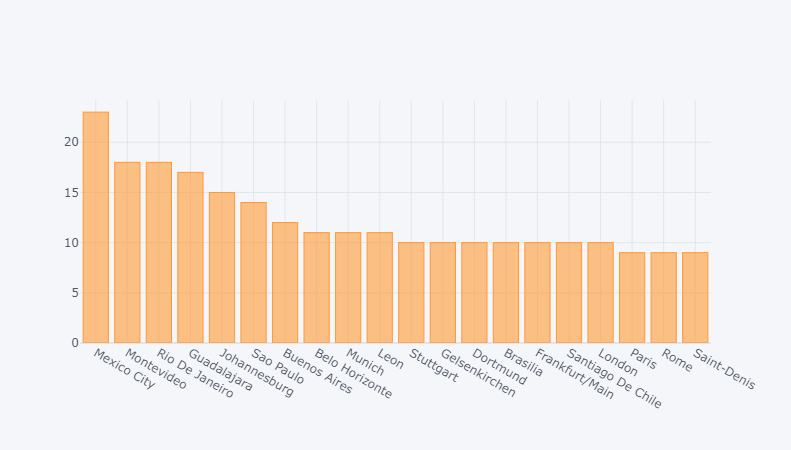

In [67]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

# Match outcomes by home and away teams

In [68]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [69]:
matches['outcomes'] = matches.apply(lambda x: get_labels(x), axis = 1)

In [70]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win
1,1930,"13 Jul, 1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team Win
2,1930,"14 Jul, 1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team Win
3,1930,"14 Jul, 1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team Win
4,1930,"15 Jul, 1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team Win


In [71]:
mt = matches['outcomes'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcomes, dtype: int64

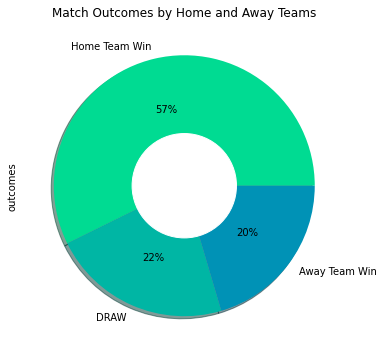

In [72]:
plt.figure(figsize = (6, 6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0, 0), 0.4, color = 'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()